## Sample Data Set: Data Exploration and Visualization

Erin Howland

In [1]:
# load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data

df = pd.read_excel(r'C:\GitHub\SA_Test\Sample_Data_Set.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# data shape and size

print('Data Shape: ', df.shape)
print('Data Size: ', df.size)

Data Shape:  (9994, 21)
Data Size:  209874


In [4]:
# gather df basics: column names, nulls, dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### Things to consider based on df info:

1. Sales data: Should be able to parse by geography, subcategory, and customer  
      a. Geography: Where might marketing allow increased penetration vs where might we be at or near capacity?  
      b. Subcategory: What categories sell well in various regions and how might that relate to possible marketing strategies?  
      c. Customer: Who are the biggest customers in terms of both dollars and number of sales?  
2. Should be able to see what products are most profitable AND why  
      a. What is selling well versus what has the best profit margins?  
3. Should be able to find insights on how to increase profit  
      a. Based on what we find, what can Sample Co. do to increase profit? Consider market penetration, customer base, regional variances, etc.

In [5]:
# summary stats

df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Things to visually investigate ased on summary stats: 

1. Mins and maxes: outliers? 
2. Regional variances?
3. Customer variances?
4. Product type (category, subcat) variances?

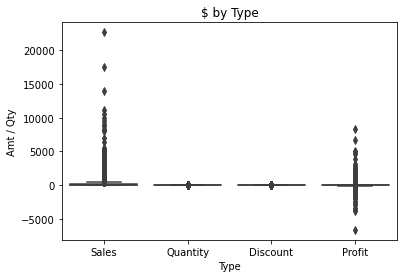

C:\Users\howla\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


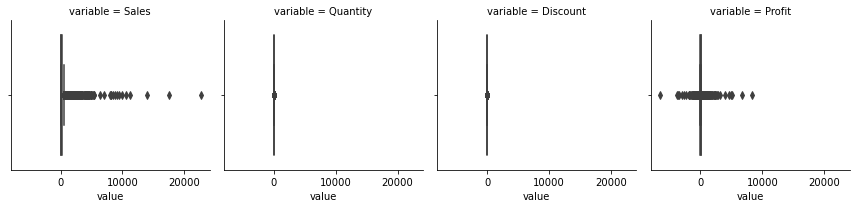

In [6]:
# box plot: Sales, Quantity, Discount, Profit

# create copy of df for specific columns to melt
df_melt = df[['Sales', 'Quantity', 'Discount', 'Profit']]
df_melted = pd.melt(df_melt)

# create boxplot
sns.boxplot(x = 'variable', y = 'value', data = df_melted).set(title = '$ by Type')
plt.xlabel('Type')
plt.ylabel('Amt / Qty')
plt.show()

# do we like a FacetGrid better?
g = sns.FacetGrid(df_melted, col = 'variable')
g.map(sns.boxplot, 'value')
plt.show()

### Notes on the boxplots

We have two very different scales happening, with Sales and Profit on one and Discount and Quantity on another. Melting all four of these is probably not the best way to show this. Ultimately, if we want to get more specific, we'll want individual plots of each of these so the scale will automatically adjust. It may depend on what's being asked and what's important.